In [2]:
import cv2
import os
import uuid
import time


In [9]:
IMAGES_PATH=os.path.join('data','images')
number_images=30

In [10]:
cap=cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('collecting image {}'.format(imgnum))
    ret,frame= cap.read()
    imgname=os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname,frame)
    cv2.imshow('frame',frame)
    time.sleep(1)
    k=cv2.waitKey(1)
    if k%256==27:
        break
cap.release()
cv2.destroyAllWindows()

collecting image 0
collecting image 1
collecting image 2
collecting image 3
collecting image 4
collecting image 5
collecting image 6
collecting image 7
collecting image 8
collecting image 9
collecting image 10
collecting image 11
collecting image 12
collecting image 13
collecting image 14
collecting image 15
collecting image 16


In [6]:
!labelme
#to make labels for your images!!

   QT_AUTO_SCREEN_SCALE_FACTOR to enable platform plugin controlled per-screen factors.
   QT_SCREEN_SCALE_FACTORS to set per-screen DPI.
   QT_SCALE_FACTOR to set the application global scale factor.


In [3]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [12]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
#limit GPU memory growth

In [13]:
tf.config.list_physical_devices('GPU')

[]

In [14]:
#load image into TF data pipeline
images=tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=False)# *.jp bet barim aa kelshi .jpg
#hon khedna kel l images men l data:images folder


In [4]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img=tf.io.decode_jpeg(byte_img)
    return img
#hon to actually read the image

In [16]:
images = images.map(load_image)


In [ ]:
image_generator=images.batch(4).as_numpy_iterator()

In [ ]:
plot_images=image_generator.next()

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx , image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [19]:
for folder in ['train','test','valid']:
    for file in os.listdir(os.path.join('data',folder,'images')):
        filename=file.split('.')[0]+'.json'
        existing_filepath=os.path.join('data','labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath=os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath,new_filepath)
#aam n7et l souwar l fiyun labels b kel folder fiyo l soura l asliye

In [5]:
import albumentations as alb
#data augmentation ta ysir eena more data

In [6]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [7]:
img = cv2.imread(os.path.join('data','train', 'images','250880f8-bf49-11ed-b683-342eb7af0360.jpg'))

In [8]:
img.shape

(480, 640, 3)

In [45]:
with open(os.path.join('data', 'train', 'labels', '250880f8-bf49-11ed-b683-342eb7af0360.json'), 'r') as f:
    label = json.load(f)

In [46]:
label

{'version': '5.1.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[196.82926829268294, 11.95121951219511],
    [501.7073170731707, 399.75609756097555]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\250880f8-bf49-11ed-b683-342eb7af0360.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZH

In [11]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
#4.3 Extract Coordinates and Rescale to Match Image Resolution
#hon aaam nekhud l coord tabaa l image 0 w nheta b array jdid (x1,x2,y1,y2)
coords = list(np.divide(coords, [640,480,640,480]))

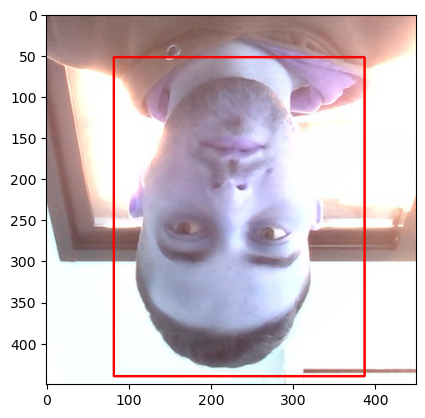

In [12]:
#4.4 Apply Augmentations and View Results
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [13]:
#5. Build and Run Augmentation Pipeline
#5.1 Run Augmentation Pipeline
#hon aam naaml l augmentation aa kel l souwar b train valid test
for partition in ['train','test','valid']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

KeyboardInterrupt: 

In [ ]:
#5.2 Load Augmented Images to Tensorflow Dataset

In [5]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)#hon aam nekhud l images men kl folder
train_images = train_images.map(load_image)#hon we are actually loading the image
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))#hon we are compressing the images
train_images = train_images.map(lambda x: x/255)

In [6]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [7]:
val_images = tf.data.Dataset.list_files('aug_data\\valid\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [35]:
#6. Prepare Labels
#6.1 Build Label Loading Function

In [12]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']


In [13]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels.as_numpy_iterator().next()

b'aug_data\\train\\labels\\250880f8-bf49-11ed-b683-342eb7af0360.0.json'

In [14]:
#6.2 Load Labels to Tensorflow Dataset
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8,tf.float16])) 
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8), array([0.   , 0.145, 0.654, 1.   ], dtype=float16))

In [15]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [16]:

val_labels = tf.data.Dataset.list_files('aug_data\\valid\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))


In [17]:
#7. Combine Label and Image Samples
#7.1 Check Partition Lengths
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 840, 840, 780, 780)

In [18]:
#7.2 Create Final Datasets (Images/Labels)
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [19]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [20]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [21]:
data_samples = train.as_numpy_iterator()
res = data_samples.next()
res[0]

array([[[[0.43890932, 0.4507353 , 0.4011642 ],
         [0.4034314 , 0.41060048, 0.35735294],
         [0.42530638, 0.42775735, 0.37579656],
         ...,
         [0.26893383, 0.26795343, 0.28609067],
         [0.2502451 , 0.25042892, 0.2855392 ],
         [0.23431373, 0.25490198, 0.30778188]],

        [[0.6918505 , 0.70104164, 0.6723039 ],
         [0.43008578, 0.4336397 , 0.40122548],
         [0.4204044 , 0.4204044 , 0.38118872],
         ...,
         [0.25484067, 0.25876224, 0.2726103 ],
         [0.25300246, 0.27120098, 0.29381126],
         [0.25128677, 0.26488972, 0.3163603 ]],

        [[0.6813725 , 0.7004902 , 0.6627451 ],
         [0.6645833 , 0.67585784, 0.6327206 ],
         [0.39859068, 0.40643382, 0.35545343],
         ...,
         [0.23780638, 0.23400736, 0.2579044 ],
         [0.2557598 , 0.2557598 , 0.29485294],
         [0.4751838 , 0.47677696, 0.47775736]],

        ...,

        [[0.88480395, 0.9352941 , 0.9485294 ],
         [0.88529414, 0.9284314 , 0.94411767]

In [ ]:
#7.3 View Images and Annotations
data_samples = train.as_numpy_iterator()
res = data_samples.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [22]:
#8. Build Deep Learning using the Functional API
#8.1 Import Layers and Base Network
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [23]:
#8.2 Download VGG16
vgg = VGG16(include_top=False)

In [24]:
vgg = VGG16(include_top=False)#include_top=false betshelle l output layers

In [25]:
#.3 Build instance of Network
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker
#eena 2 outputs:
#class2:classification laano l outputs ben 0 w 1
#regress2: regression laano fi 4 different values(bbox coordinations)

In [26]:
#8.4 Test out Neural Network
facetracker = build_model()
facetracker.summary()
X, y = train.as_numpy_iterator().next()
X.shape
classes, coords = facetracker.predict(X)
classes, coords

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_3[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

(array([[0.31700498],
        [0.24248233],
        [0.27611762],
        [0.35282838],
        [0.25719446],
        [0.20472182],
        [0.2361365 ],
        [0.3077633 ]], dtype=float32),
 array([[0.41594627, 0.5133283 , 0.5247258 , 0.49806917],
        [0.43558317, 0.45133406, 0.5054938 , 0.608693  ],
        [0.38717407, 0.4180362 , 0.5069375 , 0.42432064],
        [0.4151641 , 0.471563  , 0.45918798, 0.5460799 ],
        [0.492667  , 0.48462307, 0.565306  , 0.48825535],
        [0.46879366, 0.47995535, 0.5309688 , 0.5383539 ],
        [0.47645652, 0.44332755, 0.69298804, 0.49180666],
        [0.4856414 , 0.4543118 , 0.5645068 , 0.5044771 ]], dtype=float32))

In [27]:
#9.1 Define Optimizer and LR
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [28]:
#9.2 Create Localization Loss and Classification Loss
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] #true height of the bbox
    w_true = y_true[:,2] - y_true[:,0] #true width of the bbox

    h_pred = yhat[:,3] - yhat[:,1] #predicted height of bbox
    w_pred = yhat[:,2] - yhat[:,0] #predicted width of bbox
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [29]:
#9.3 Test out Loss Metrics
localization_loss(y[1], coords)
classloss(y[0], classes)
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=10.083383>

In [27]:
#10. Train Neural Network
#10.1 Create Custom Model Class

In [30]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [31]:
model = FaceTracker(facetracker)
model.compile(opt, classloss, regressloss)

In [30]:
#10.2 Train
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/10
473/473 [==============================] - 898s 2s/step - total_loss: 0.1892 - class_loss: 0.0028 - regress_loss: 0.1879 - val_total_loss: 0.0640 - val_class_loss: 1.8179e-06 - val_regress_loss: 0.0640
Epoch 2/10
473/473 [==============================] - 712s 1s/step - total_loss: 0.0411 - class_loss: 3.5656e-06 - regress_loss: 0.0411 - val_total_loss: 0.1354 - val_class_loss: 4.5449e-06 - val_regress_loss: 0.1354
Epoch 3/10
473/473 [==============================] - 722s 2s/step - total_loss: 0.0230 - class_loss: 1.1856e-06 - regress_loss: 0.0230 - val_total_loss: 0.0657 - val_class_loss: 2.2352e-07 - val_regress_loss: 0.0657
Epoch 4/10
473/473 [==============================] - 718s 2s/step - total_loss: 0.0162 - class_loss: 6.2755e-07 - regress_loss: 0.0162 - val_total_loss: 0.0350 - val_class_loss: 3.4273e-07 - val_regress_loss: 0.0350
Epoch 5/10
473/473 [==============================] - 730s 2s/step - total_loss: 0.0111 - class_loss: 2.9716e-07 - regress_loss: 0.0111 

In [ ]:
#10.3 Plot Performance
hist.history
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [ ]:
#11. Make Predictions
#11.1 Make Predictions on Test Set
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

1/1 [==============================] - 0s 336ms/step


In [30]:
#11.2 Save the Model
from tensorflow.keras.models import load_model
facetracker.save('facetracker.h5')
facetracker = load_model('facetracker.h5')


In [31]:

#11.3 Real Time Detection
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 110ms/step
